<div style="text-align: center;">
    <span style="color: red; font-size: 70px;"> Ghiacciaio del Morteratsch </span>
</div>

In [30]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import itertools

from scipy.stats import linregress
from scipy.optimize import curve_fit

In [31]:
ASWdata = pd.read_excel('Boval#.xlsx')

data = ASWdata['Data'].to_numpy()
ora = ASWdata['Ora'].to_numpy()
windDir = ASWdata['WindDir'].to_numpy()
windSpeed = ASWdata['WindSpeed'].to_numpy()
maxSpeed = ASWdata['MaxSpeed'].to_numpy()
swin = ASWdata['Swin'].to_numpy()
swout = ASWdata['Swout'].to_numpy()
lwin = ASWdata['Lwin'].to_numpy()
lwout = ASWdata['Lwout'].to_numpy()
airT = ASWdata['AirT'].to_numpy()
relHum = ASWdata['RelHum'].to_numpy()
press = ASWdata['Press'].to_numpy()
alt = ASWdata['H'].to_numpy()
fusMeas = ASWdata['Fusion'].to_numpy()

mask = swin < 15
swin[mask] = 0
swout[mask] = 0

mask = swin < swout
swin[mask] = 1.1 * swout[mask]

<div style="text-align: center;">
    <span style="color: blue; font-size: 50px;"> Bilancio energetico </span>
</div>

<center>

## Shortwave

<center>

In [32]:
swinDaily = []; swinday = 0
swoutDaily = []; swoutday = 0
giorniReg = [data[0].split()[0]]; appo = data[0].split()[0]; conta = 0; 

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        conta += 1
        swinday += swin[i]
        swoutday += swout[i]

    else:
        swinDaily.append(swinday/conta)
        swoutDaily.append(swoutday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        swinday = swin[i]
        swoutday = swout[i]

swinDaily.append(swinday/conta)
swoutDaily.append(swoutday/conta)

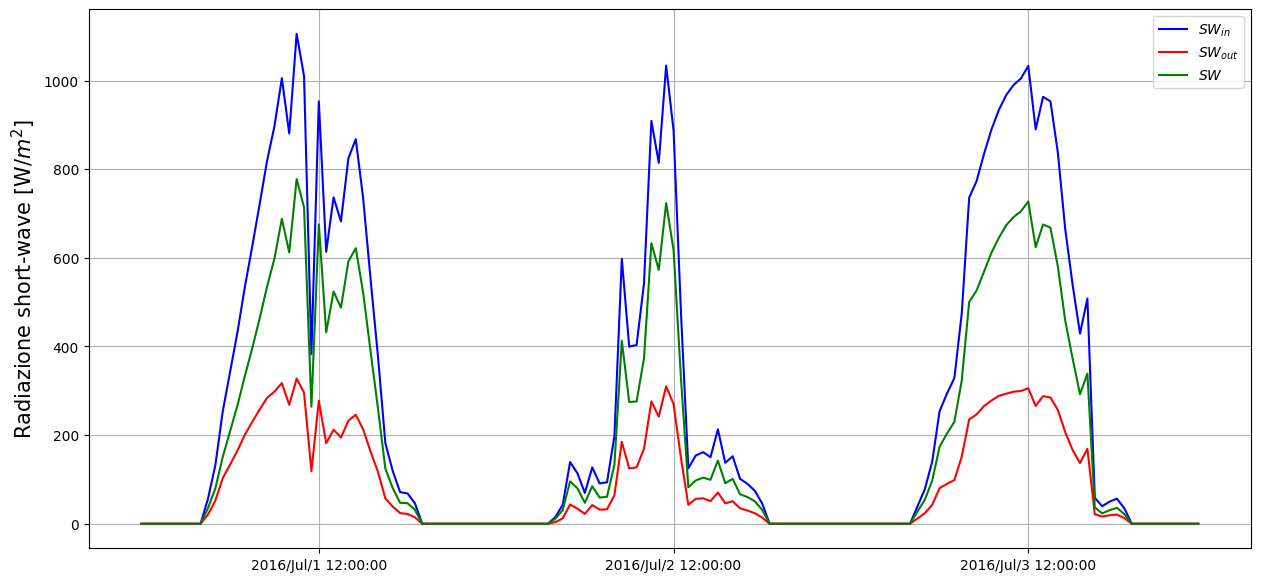

In [33]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(data[75:219], swin[75:219], 'blue', label = r'$SW_{in}$')
plt.plot(data[75:219], swout[75:219], 'red', label = r'$SW_{out}$')
plt.plot(data[75:219], swin[75:219] - swout[75:219], 'green', label = r'$SW$')
plt.xticks([data[99], data[147], data[195]])

plt.ylabel(r'Radiazione short-wave [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

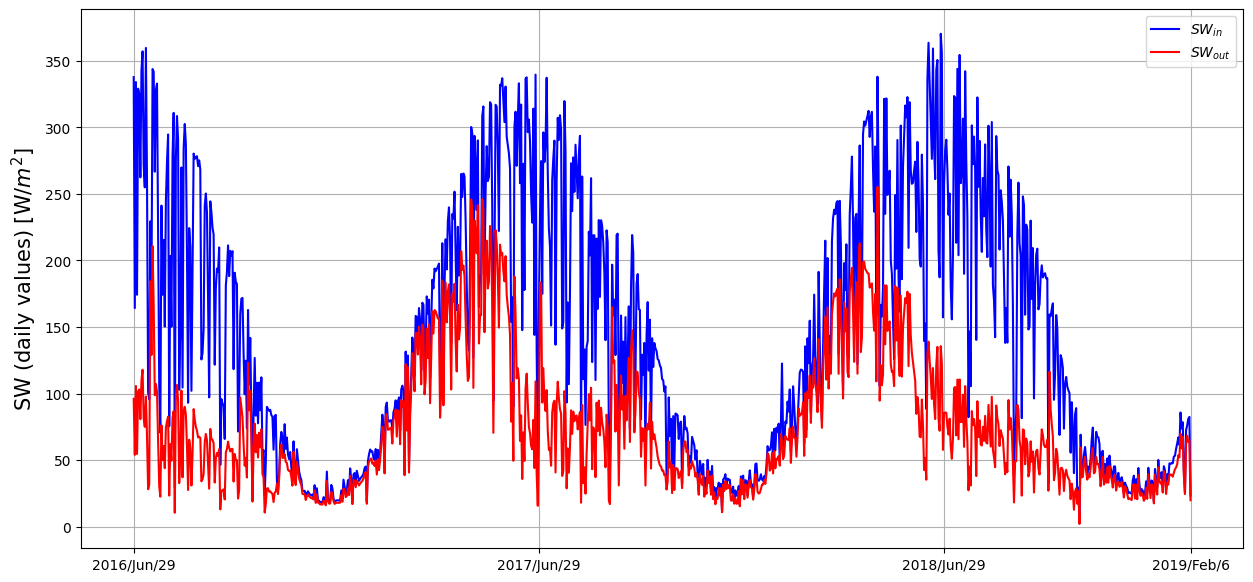

In [34]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(swinDaily), 'blue', label = r'$SW_{in}$')
plt.plot(giorniReg, np.array(swoutDaily), 'red', label = r'$SW_{out}$')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'SW (daily values) [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

<center>

## Albedo

</center>

In [35]:
mask = swin > 15
swin_al = swin[mask]; swout_al = swout[mask]; data_al = data[mask]

In [36]:
albedo = swout_al/swin_al
swin1 = swin_al[albedo < 0.42]
swout1 = swout_al[albedo < 0.42]

swin2 = swin_al[albedo > 0.62]
swout2 = swout_al[albedo > 0.62]


coeff1 = np.polyfit(swin1, swout1, 1)
m1, b1 = coeff1; x1 = np.array([0, 1200]); y1 = m1 * x1 + b1 

coeff2 = np.polyfit(swin2, swout2, 1)
m2, b2 = coeff2; x2 = np.array([0, 1200]); y2 = m2 * x2 + b2 

slope, intercept, r1, p_value, std_err = linregress(swin1, swout1)
slope, intercept, r2, p_value, std_err = linregress(swin2, swout2)

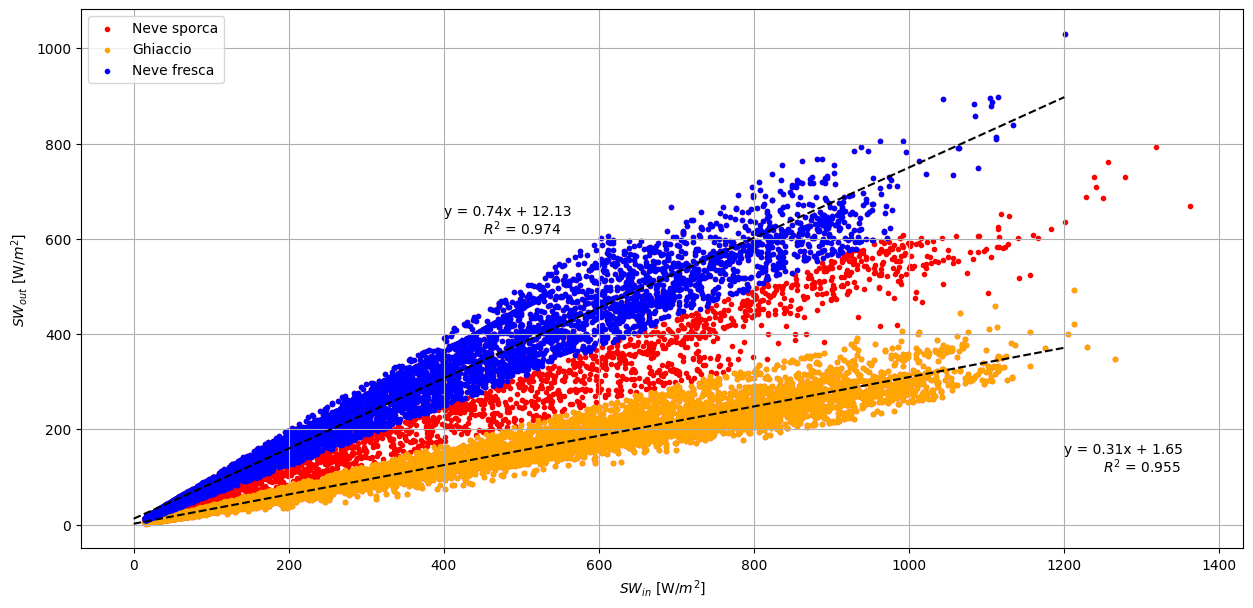

In [37]:
fig = plt.figure(figsize = (15, 7))

plt.scatter(swin_al, swout_al, c = 'red', marker = '.', label = 'Neve sporca')
plt.scatter(swin1, swout1, c = 'orange', marker = '.', label = 'Ghiaccio')
plt.scatter(swin2, swout2, c = 'blue', marker = '.', label = 'Neve fresca')
plt.plot(x1, y1, linestyle = '--', color = 'black')
plt.plot(x2, y2, linestyle = '--', color = 'black')

equazione = f'y = {round(m1, 3):.2f}x + {round(b1, 3):.2f}'
plt.text(1200, 150, equazione, fontsize=10, color='black') 
plt.text(1250, 110, f'$R^2$ = {round(pow(r1, 2), 3)}', fontsize=10, color='black') 

equazione = f'y = {round(m2, 3):.2f}x + {round(b2, 3):.2f}'
plt.text(400, 650, equazione, fontsize=10, color='black') 
plt.text(450, 610, f'$R^2$ = {round(pow(r2, 2), 3)}', fontsize=10, color='black') 

plt.xlabel(r'$SW_{in}$ [W/$m^2$]')
plt.ylabel(r'$SW_{out}$ [W/$m^2$]')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

In [38]:
albedoDaily = []; albedoday = 0
giorniReg = [data_al[0].split()[0]]; appo = data_al[0].split()[0]; conta = 0; 

for i in range(0, len(data_al)):

    if data_al[i].split()[0] == appo:
        conta += 1
        albedoday += albedo[i]

    else:
        giorniReg.append(data_al[i].split()[0])
        albedoDaily.append(albedoday/conta)

        conta = 1
        appo = data_al[i].split()[0]
        albedoday = albedo[i]


albedoDaily.append(albedoday/conta)

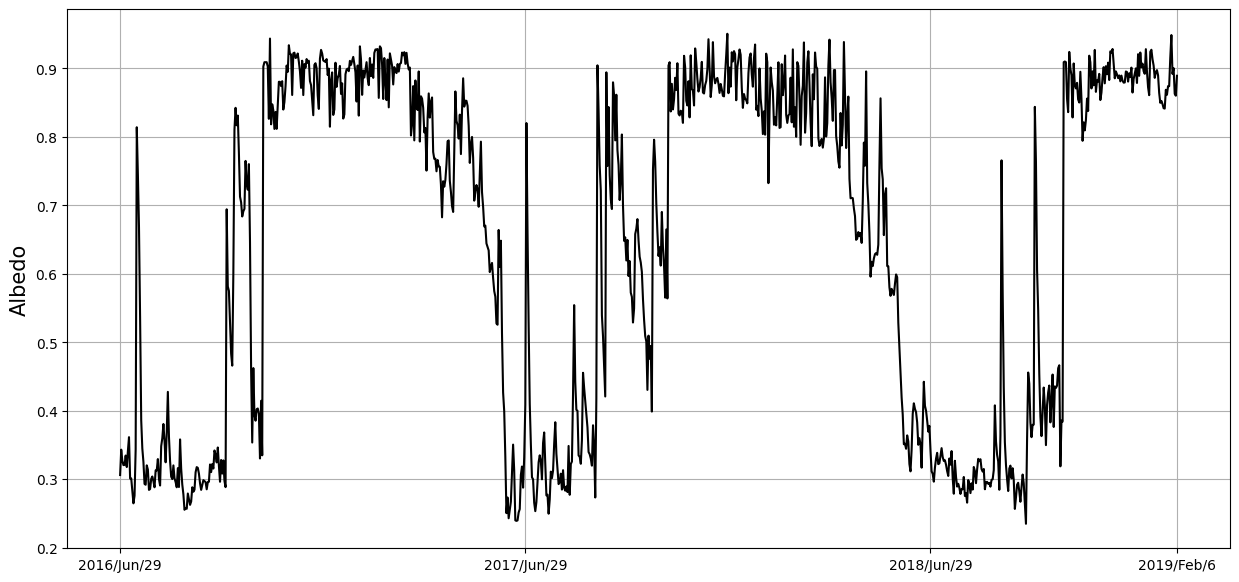

In [39]:
fig = plt.figure(figsize = (15,7))

plt.plot(giorniReg, albedoDaily, 'black')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'Albedo', fontsize = 15)
plt.grid(True)
plt.show()

In [40]:
albedo2016 = []; albedo2017 = []; albedo2018 = []; albedo2019 = []

for i in range(0, len(giorniReg)):

    if giorniReg[i].split('/')[0] == '2016':
        albedo2016.append(albedoDaily[i])

    elif giorniReg[i].split('/')[0] == '2017':
        albedo2017.append(albedoDaily[i])

    elif giorniReg[i].split('/')[0] == '2018':
        albedo2018.append(albedoDaily[i])

    elif giorniReg[i].split('/')[0] == '2019':
        albedo2019.append(albedoDaily[i])

albedo2016 = np.array(albedo2016); albedo2017 = np.array(albedo2017)
albedo2018 = np.array(albedo2018); albedo2019 = np.array(albedo2019)

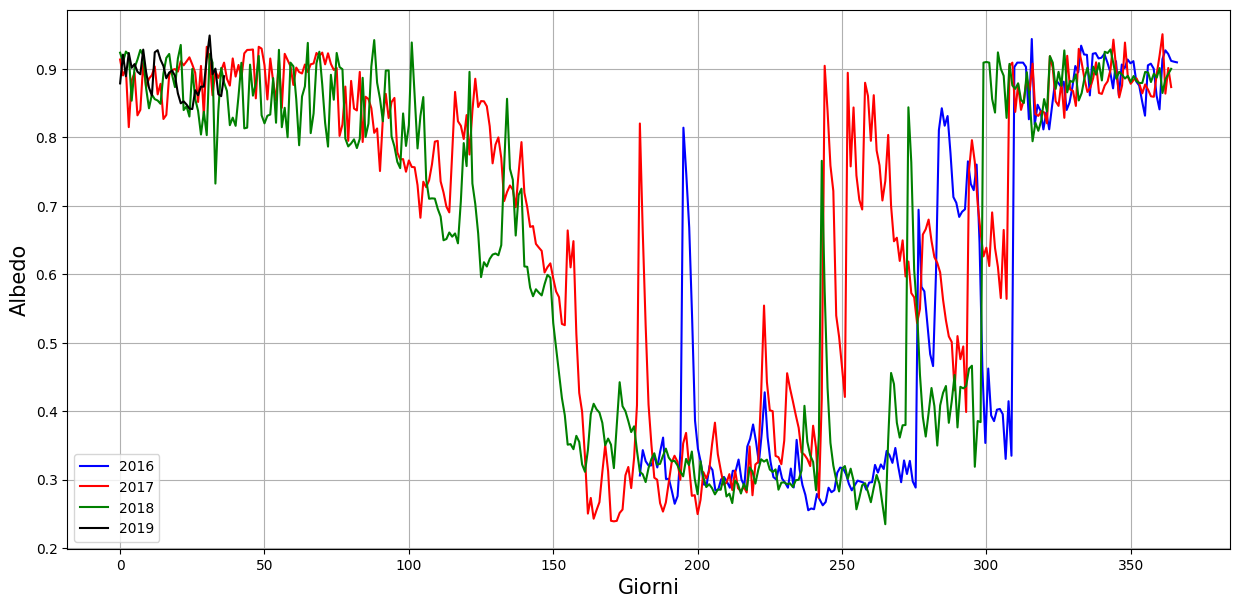

In [41]:
fig = plt.figure(figsize = (15,7))

x2016 = np.linspace(366 - len(albedo2016), 366, len(albedo2016))

plt.plot(x2016, albedo2016, 'blue', label = '2016')
plt.plot(albedo2017, 'red', label = '2017')
plt.plot(albedo2018, 'green', label = '2018')
plt.plot(albedo2019, 'black', label = '2019')

plt.ylabel(r'Albedo', fontsize = 15)
plt.xlabel(r'Giorni', fontsize = 15)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

<center>

## Longwave

</center>

In [42]:
lwinDaily = []; lwinday = 0
lwoutDaily = []; lwoutday = 0
giorniReg = [data[0].split()[0]]; appo = data[0].split()[0]; conta = 0; 

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        conta += 1
        lwinday += lwin[i]
        lwoutday += lwout[i]

    else:
        lwinDaily.append(lwinday/conta)
        lwoutDaily.append(lwoutday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        lwinday = lwin[i]
        lwoutday = lwout[i]

lwinDaily.append(lwinday/conta)
lwoutDaily.append(lwoutday/conta)

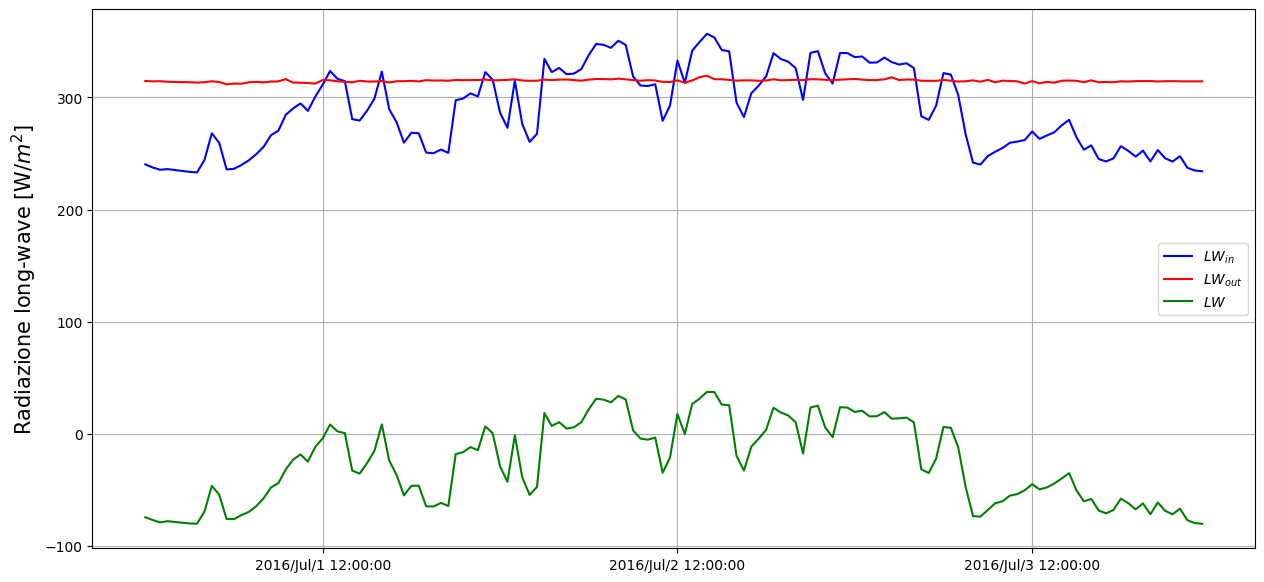

In [43]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(data[75:219], lwin[75:219], 'blue', label = r'$LW_{in}$')
plt.plot(data[75:219], lwout[75:219], 'red', label = r'$LW_{out}$')
plt.plot(data[75:219], lwin[75:219] - lwout[75:219], 'green', label = r'$LW$')
plt.xticks([data[99], data[147], data[195]])

plt.ylabel(r'Radiazione long-wave [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

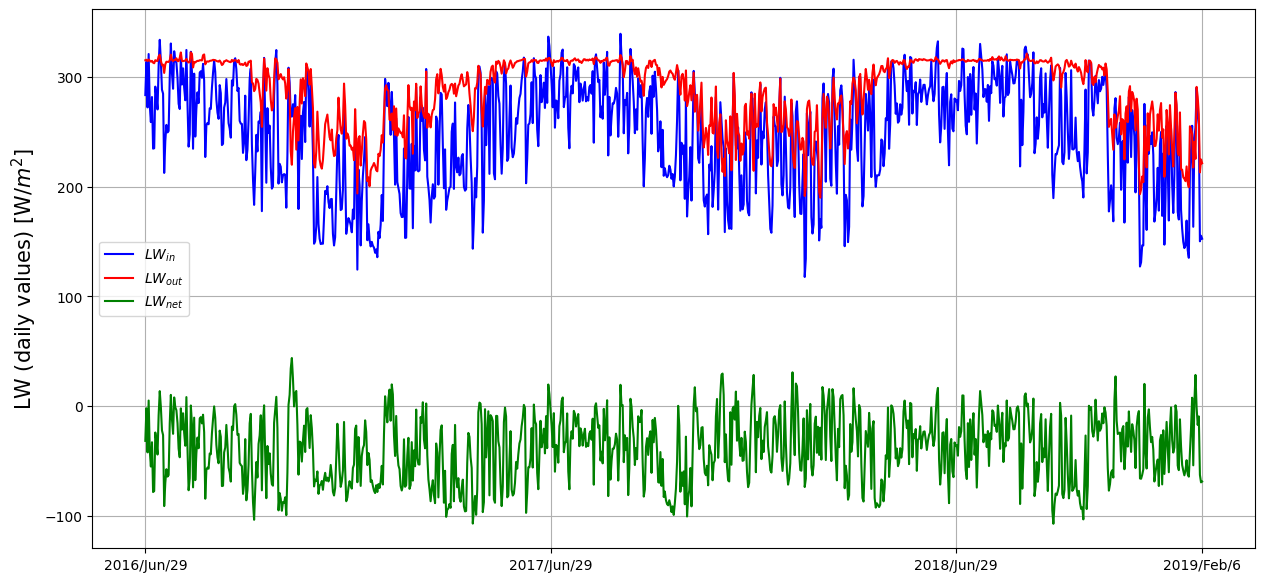

In [44]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(lwinDaily), 'blue', label = r'$LW_{in}$')
plt.plot(giorniReg, np.array(lwoutDaily), 'red', label = r'$LW_{out}$')
plt.plot(giorniReg, np.array(lwinDaily) - np.array(lwoutDaily), 'green', label = r'$LW_{net}$')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'LW (daily values) [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

<center>

## Temperatura media aria

<center>

In [45]:
tDaily = []; tday = 0
giorniReg = [data[0].split()[0]]; appo = data[0].split()[0]; conta = 0; 

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        conta += 1
        tday += airT[i]

    else:
        tDaily.append(tday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        tday = swin[i]

tDaily.append(tday/conta)

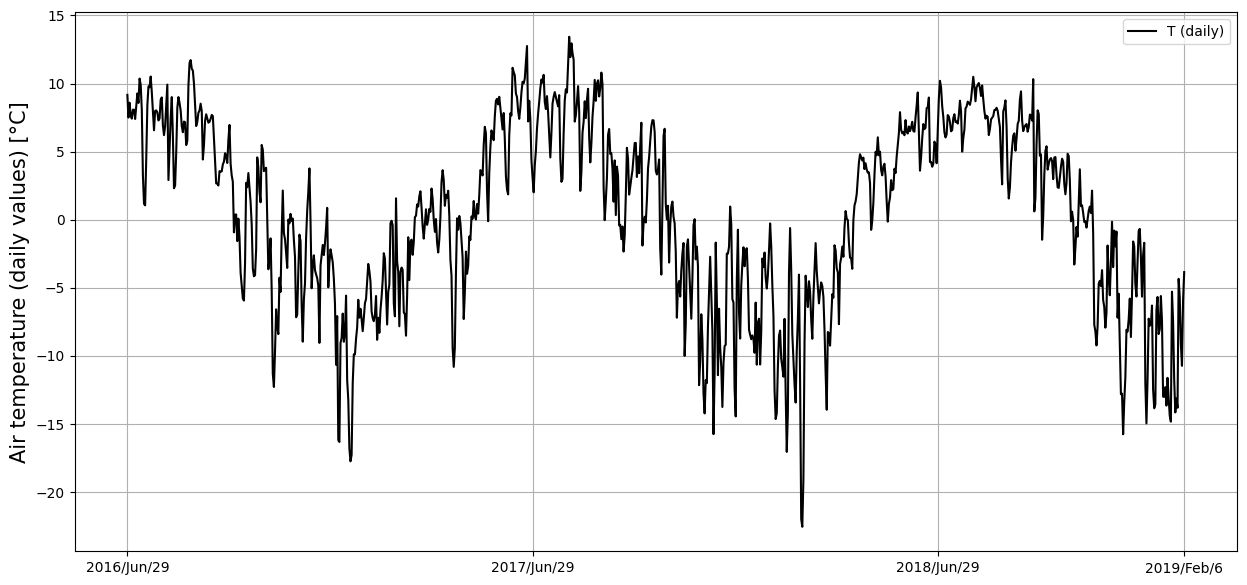

In [46]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(tDaily), 'black', label = r'T (daily)')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'Air temperature (daily values) [°C]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

<center>

## Sensible heat flux

</center>

In [47]:
alt[17547] = -2.91; alt[41198] = -1.73

wind2m = pow(2/abs(alt), 0.148) * windSpeed
temp2m = []

for i in range(0, len(airT)):
    if airT[i] < 0:
        temp2m.append(airT[i])
    elif airT[i] == 0:
        temp2m.append((airT[i]) * pow(2/abs(alt[i]), 0.162))
    else:
        temp2m.append((airT[i]) * pow(2/abs(alt[i]), 0.126))

tempSup = []; sigma = 5.67e-8 * 0.98; appo = 0
for i in range(0, len(lwout)):
    appo = pow(lwout[i]/sigma, 0.25)
    if appo > 273.15:
        tempSup.append(0)
    else:
        tempSup.append(appo - 273.15)

temp2m = np.array(temp2m); tempSup = np.array(tempSup)

In [48]:
pa = 1000; cp = 1.006; ch = 0.00127

sensibleHeat = pa * cp * ch * wind2m * (temp2m - tempSup)

sensibleDaily = []; sensibleday = 0
tSupDaily = []; tsupday = 0
giorniReg = [data[0].split()[0]]; appo = data[0].split()[0]; conta = 0; 

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        conta += 1
        sensibleday += sensibleHeat[i]
        tsupday += tempSup[i]

    else:
        sensibleDaily.append(sensibleday/conta)
        tSupDaily.append(tsupday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        sensibleday = sensibleHeat[i]
        tsupday = tempSup[i]

sensibleDaily.append(sensibleday/conta)
tSupDaily.append(tsupday/conta)

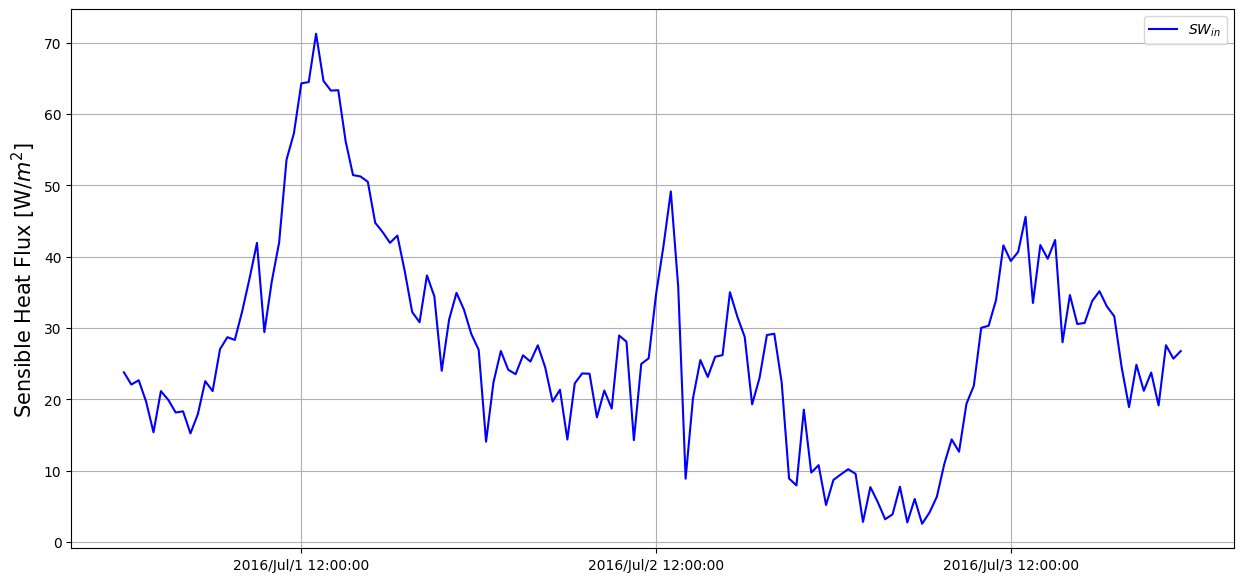

In [49]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(data[75:219], sensibleHeat[75:219], 'blue', label = r'$SW_{in}$')
plt.xticks([data[99], data[147], data[195]])

plt.ylabel(r'Sensible Heat Flux [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

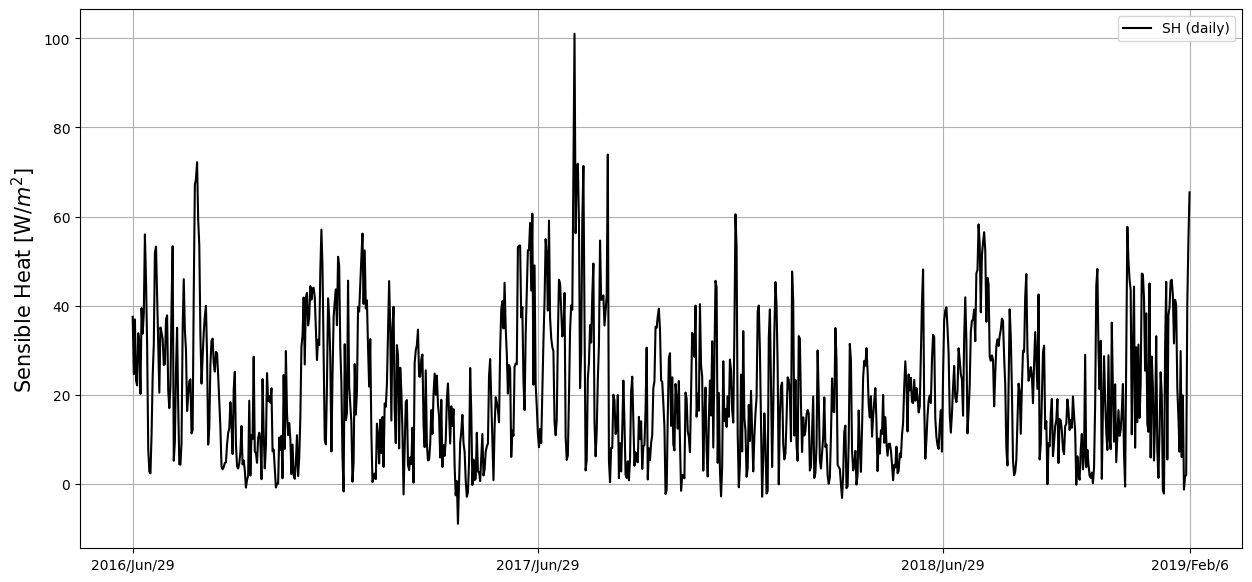

In [50]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(sensibleDaily), 'black', label = r'SH (daily)')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'Sensible Heat [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

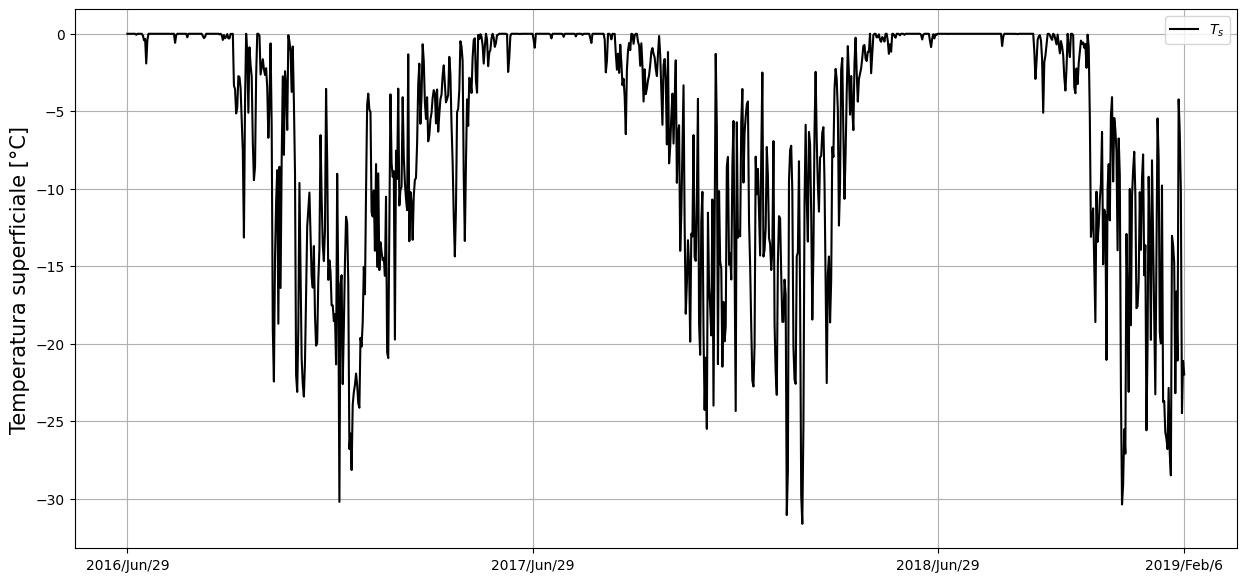

In [51]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(tSupDaily), 'black', label = r'$T_s$')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'Temperatura superficiale [°C]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

<center>

## Latent Heat

</center>

In [52]:
es = 6.112 * np.exp(17.67 * tempSup/(tempSup + 243.5))
es2m = 6.112 * np.exp(17.67 * temp2m/(temp2m + 243.5))

ws2m = 0.622 * es2m/(press - es2m)
w2m = relHum/100 * ws2m

lv = 2.501 - 2.361e-3 * airT
e2m = press * (w2m/(w2m + 0.622))

latentHeat = 0.622 * lv * ch * wind2m * (e2m - es) * 1e6/press

latentDaily = []; latentday = 0
giorniReg = [data[0].split()[0]]; appo = data[0].split()[0]; conta = 0; 

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        conta += 1
        latentday += latentHeat[i]

    else:
        latentDaily.append(latentday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        latentday = swin[i]

latentDaily.append(latentday/conta)

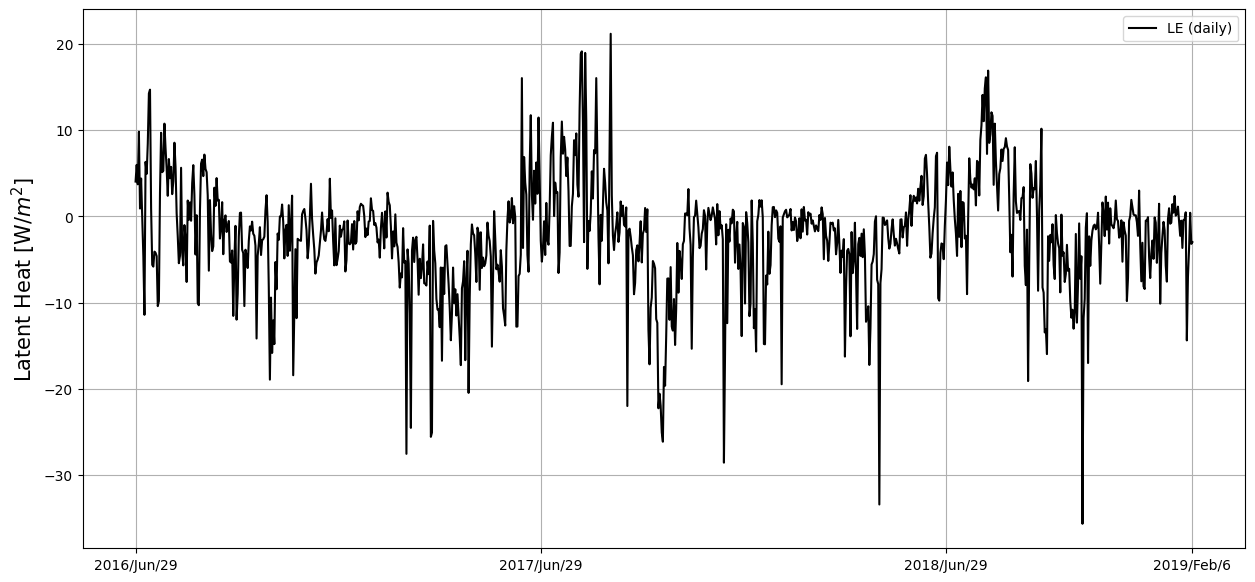

In [53]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(latentDaily), 'black', label = r'LE (daily)')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'Latent Heat [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

<center>

## Budget energetico

<center>

In [54]:
swnet = swin - swout
lwnet = lwin - lwout
sommaComp = swnet + lwnet + sensibleHeat + latentHeat

sommaDaily = []; sday = 0
giorniReg = [data[0].split()[0]]; appo = data[0].split()[0]; 

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        sday += sommaComp[i]
        conta += 1

    else:
        sommaDaily.append(sday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        sday = sommaComp[i]

sommaDaily.append(sday/conta)

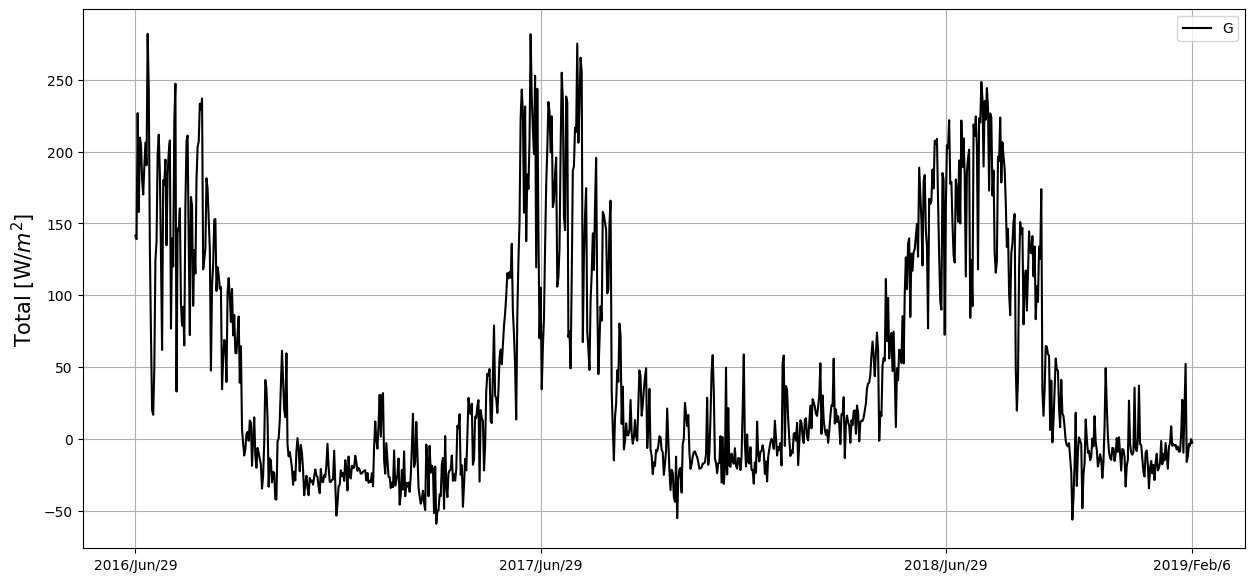

In [55]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(sommaDaily), 'black', label = r'G')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel(r'Total [W/$m^2$]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

<center>

## Fusione

<center>

In [56]:
swnet = swin - swout; lwnet = lwin - lwout; latGh = 334000
sommaComp = swnet + lwnet + sensibleHeat + latentHeat

swin_al = swin[mask]; swout_al = swout[mask]

sommaComp = sommaComp * 3600

# Fusione singole fascie orarie
fusione = []; giorniReg = np.array(giorniReg); conta = 0
for i in range(0, len(sommaComp) - 1):
    if str(data[i]).split()[0] == str(data[i+1]).split()[0]:
        if sommaComp[i] > 0 and tempSup[i] == 0 and albedoDaily[conta] < 0.35:
            fusione.append(-sommaComp[i]/latGh) 
        else:
            fusione.append(0)
    
    else:
        conta += 1

        if sommaComp[i] > 0 and tempSup[i] == 0 and albedoDaily[conta] < 0.35:
            fusione.append(-sommaComp[i]/latGh) 
        else:
            fusione.append(0)

fusione.append(0)
fusione = np.array(fusione)

In [57]:
fDaily = []; fday = 0
giorniReg = [data[0].split()[0]]; appo = 0

measMelt = fusMeas - fusMeas[2]; measMelt[0] = 0;  measMelt[1] = 0
measMelt[34943:] = measMelt[34943:] - (measMelt[34943] - measMelt[34942])

mesfDaily = []; mesfday = 0; appo = data[0].split()[0]

for i in range(0, len(data)):

    if data[i].split()[0] == appo:
        conta += 1
        fday += fusione[i]
        mesfday += measMelt[i]

    else:
        fDaily.append(fday)
        mesfDaily.append(mesfday/conta)
        giorniReg.append(data[i].split()[0])

        conta = 1
        appo = data[i].split()[0]
        fday = fusione[i]
        mesfday = measMelt[i]

fDaily.append(fday)
mesfDaily.append(mesfday/conta)

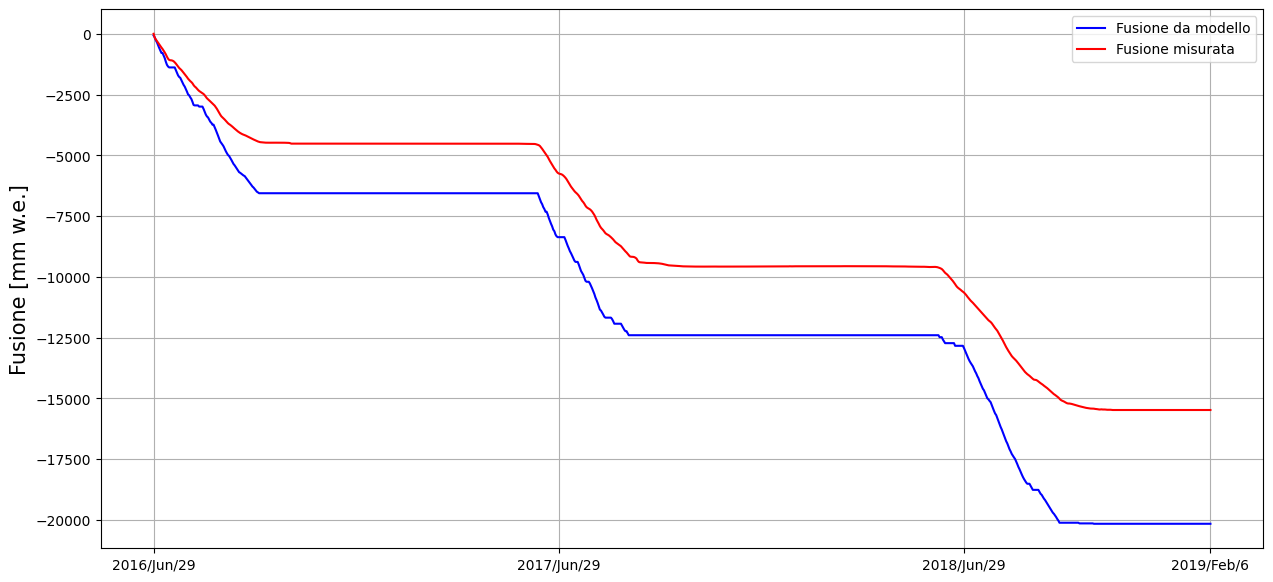

In [58]:
fig = plt.figure(figsize = (15,7))
 
plt.plot(giorniReg, np.array(np.cumsum(fDaily)), 'blue', label = r'Fusione da modello')
plt.plot(giorniReg, np.array(mesfDaily) * 1000, 'red', label = r'Fusione misurata')
plt.xticks([giorniReg[0], giorniReg[365], giorniReg[730], giorniReg[952]])

plt.ylabel('Fusione [mm w.e.]', fontsize = 15)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()